## 汽轮机高压缸相关参数计算
本次算例采用《汽轮机原理》课程的一次作业题目，题面前两问如下：  
国产引进型Westinghouse 300MW汽轮机，额定工况下主汽门前的主蒸汽压力为16.7Mpa、温度为537℃，主蒸汽流量为910.203t/h，排汽干度为 0.938，给水温度为 274℃，采用 高中压合缸、1个双分流对置低压缸结构布置，各级主要设计数据见附表。  
(1) 计算高压缸各级的理想焓降和实际焓降，由此得到高压缸各级的相对内效率和高压缸的重热系数。   
(2) 画出高压缸额定工况下各级相对内效率分布棒形图。
![高压缸图](./img/table.png)

In [1]:
# -*- coding: UTF-8 -*-
'''
@author: XMJ
'''
import matplotlib.pyplot as plt
import numpy as np
import math
from seuif97 import *
from prettytable import PrettyTable

fileName='high.txt'

fileData={'G':[],'t1':[],'p1':[],'delta_p':[],'Pi':[]}
#G表示级流量(T/h), t1表示级前温度, p1表示级前压力(MPa), delta_p表示全级压降(MPa), Pi表示内功率(kW)

h1=[] #级前焓(kJ/kg)
s1=[] #级前比熵(kJ/kg*k)
p2=[] #级后压力(MPa)
h2=[] #级后焓(kJ/kg)
delta_h=[] #理想焓降(kJ/kg)
delta_hi=[] #有效焓降(kJ/kg)
eta=[] #相对内效率
a=0 #重热系数


def getData(fileName):

    dataFile = open(fileName, 'r')
    
    discardHeader = dataFile.readline()

    for line in dataFile:
        n,G,t1,p1,delta_p,Pi= line.split()
        fileData['G'].append(float(G))
        fileData['t1'].append(float(t1))
        fileData['p1'].append(float(p1))
        fileData['delta_p'].append(float(delta_p))
        fileData['Pi'].append(float(Pi))

    dataFile.close()
    return fileData
 
    
def fitData(fileData):
    for i in range(0,12):
        h1.append(pt2h(fileData['p1'][i],fileData['t1'][i]))
        s1.append(pt2s(fileData['p1'][i],fileData['t1'][i]))
        p2.append(fileData['p1'][i]-fileData['delta_p'][i])
        h2.append(ps2h(p2[i], s1[i]))
        delta_h.append(h1[i]-h2[i])
        delta_hi.append(fileData['Pi'][i]/(fileData['G'][i]/3.6)) #需要将流量从T/h换算成kg/s
        eta.append(delta_hi[i]/delta_h[i])
    
    ht=ps2h(p2[11], s1[0])
    delta_ht_mac=h1[0]-ht
    sum=0 #∑delta_ht
    for i in range(0,12):
        sum+=delta_h[i]
    a = ( sum - delta_ht_mac ) / delta_ht_mac
    return a


def print_table():
    
    table = PrettyTable(["级号","级流量","级前温度","级前压力","级前焓","级前比熵","全级压差","级后压力","级后焓",
                         "内功率","理想焓降","有效焓降","相对内效率"])  
    table.align= "c" #居中
    table.padding_width = 1 #One space between column edges and contents (default)
    
    for i in range(0,12):
        table.add_row([i,"%.2f" % fileData['G'][i],"%.2f" % fileData['t1'][i],"%.2f" % fileData['p1'][i],
                       "%.2f" % h1[i],"%.2f" % s1[i],"%.3f" % fileData['delta_p'][i],
                       "%.2f" % p2[i],"%.2f" % h2[i],"%.2f" % fileData['Pi'][i],"%.2f" % delta_h[i],"%.2f" % delta_hi[i],"%.4f" % eta[i]])
    print(table)
    
    
getData(fileName)
a = fitData(fileData)
print_table()
print('\n','重热系数a为','\t',a)

+------+--------+----------+----------+---------+----------+----------+----------+---------+----------+----------+----------+------------+
| 级号 | 级流量 | 级前温度 | 级前压力 |  级前焓 | 级前比熵 | 全级压差 | 级后压力 |  级后焓 |  内功率  | 理想焓降 | 有效焓降 | 相对内效率 |
+------+--------+----------+----------+---------+----------+----------+----------+---------+----------+----------+----------+------------+
|  0   | 905.60 |  537.00  |  16.00   | 3403.74 |   6.44   |  4.250   |  11.75   | 3304.20 | 18555.00 |  99.53   |  73.76   |   0.7411   |
|  1   | 886.10 |  483.80  |  11.75   | 3309.21 |   6.45   |  0.883   |  10.87   | 3284.99 | 5365.00  |  24.22   |  21.80   |   0.8999   |
|  2   | 886.10 |  471.10  |  10.70   | 3289.32 |   6.46   |  0.859   |   9.84   | 3263.74 | 5608.00  |  25.58   |  22.78   |   0.8908   |
|  3   | 886.10 |  457.90  |   9.87   | 3265.81 |   6.46   |  0.857   |   9.01   | 3238.54 | 5992.00  |  27.28   |  24.34   |   0.8925   |
|  4   | 886.10 |  443.80  |   9.01   | 3241.21 |   6.46   |  0.838   |   

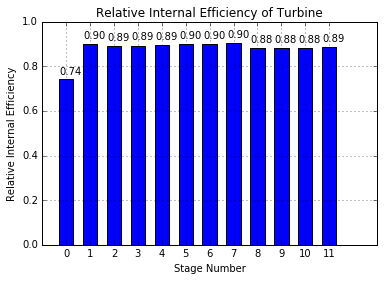

In [2]:
%matplotlib inline 

def autolabel(rects): #画柱状图
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/24, 1.03*height, "%.2f" % float(height))
    
plt.xlabel(u"Stage Number")
plt.ylabel(u"Relative Internal Efficiency")

rect = plt.bar(left = (1,2,3,4,5,6,7,8,9,10,11,12),color='b',
        height = (eta[0],eta[1],eta[2],eta[3],eta[4],eta[5],eta[6],eta[7],eta[8],eta[9],eta[10],eta[11]),
        width = 0.6,align="center")
    
plt.title(u"Relative Internal Efficiency of Turbine")
plt.xticks((1,2,3,4,5,6,7,8,9,10,11,12),(u"0",u"1",u"2",u"3",u"4",u"5",u"6",u"7",u"8",u"9",u"10",u"11"))
autolabel(rect)
plt.grid(True)
plt.show()